In [4]:
import distract
import finetune
import importlib
import matplotlib.pyplot as plt
import numpy as np
import torch

finetune.CLASSIFIER_NAME = 'resnet'
finetune.NUM_EPOCHS = 15
finetune.FEATURE_EXTRACT = False
finetune.DATASET = 'FGVC-Aircraft'
classifier = finetune.initialize_model()
# classifier, hist = finetune.finetune_model(classifier)

In [5]:
importlib.reload(distract)
distractor = distract.initialize_distractor(classifier)
print(distractor)

GumbelDistractor(
  (cnns): ModuleList(
    (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
)


In [6]:
importlib.reload(distract)

history = distract.train_distractor(distractor, classifier)

epoch: 4, val: 100%|██████████| 417/417 [02:08<00:00,  3.24it/s, avg_baseline_loss=0.0083, avg_distractor_loss=0.0041]


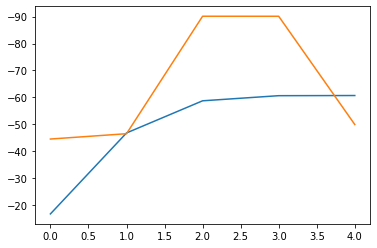

In [15]:
for phase in ['train', 'val']:
    avg_loss_baseline = np.array([np.mean(list(map(lambda l: l.cpu().item(), epoch[phase]['baseline']))) for epoch in history])
    avg_loss_distracted = np.array([np.mean(list(map(lambda l: l.cpu().item(), epoch[phase]['distracted']))) for epoch in history])
    loss_differences = np.divide(avg_loss_distracted - avg_loss_baseline, avg_loss_baseline) * 100
    plt.plot(loss_differences)
# plt.plot([l.cpu().data.numpy() for l in distractor_loss['train']], 'r')
# plt.plot(distractor_loss, 'r')
plt.gca().invert_yaxis()
plt.show()

In [17]:
next_baseline_loss, next_distractor_loss = distract.train_distractor(distractor, classifier)

100%|██████████| 417/417 [02:29<00:00,  2.79it/s, running_avg_baseline_loss=0.256, running_avg_distractor_loss=0.194]


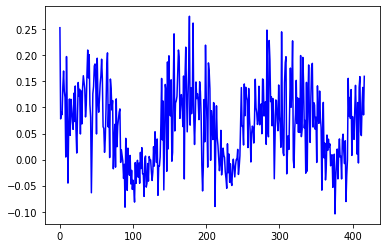

In [18]:
plt.plot(np.array([l.cpu().item() for l in next_baseline_loss['train']]) - np.array([l.cpu().item() for l in next_distractor_loss['train']]), 'b')
# plt.plot([l.cpu().data.numpy() for l in distractor_loss['train']], 'r')
# plt.plot(distractor_loss, 'r')
plt.show()